# Helper functions

In [ ]:
# Import
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import re
import sys
from pathlib import Path

# Add SynFlow to path in order to import modules
repo_root = "../../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
from SynFlow.SCD import print_jsd_by_period, plot_jsd_by_period, plot_items_jsd_by_period

# Analysis

In [ ]:
# RSC
target_lemma = 'acid'
target_pos = 'N'
keyword_string = f'{target_lemma}\t{target_pos}' # Or you can use the full POS for precision (e.g., {target_lemma}\tNOUN)
period = '1750-1819'
corpus_path = './RSC/1750-1819_che_half_decades'
fname_pattern = re.compile(
    r'Royal_Society_Corpus_open_v6\.0_text_(?P<id>\d+)_(?P<year>\d+)\.txt$'
)

In [ ]:
output_folder = Path(f'./')
input_SCD = output_folder / 'input' / 'SCD' /f'{target_lemma}-{target_pos}-{period}'
os.makedirs(input_SCD, exist_ok=True)

### Acid

In [ ]:
fname_df_pattern = re.compile(
    rf'air/Royal_Society_Corpus_open_v6\.0_text_'   # fixed prefix
    rf'(?P<id>\d+)_'                            # capture numeric ID
    rf'(?P<year>\d+)'                           # capture year
    rf'.txt/\d+$'             #  and extension and line number
)

all_sfillers_df_path = './output/acid-N-1750-1819/Explorer/acid_samples_sfillerdf_all.csv'

#### Preprocessing

This step is unique to the type of data we're working with.

##### pa_obl

In [14]:
acid_pansubj_df_path = f'{input_SCD}/acid_pansubj_1750-1819.csv'
interest_slot = 'pa_nsubj'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
acid_pansubj_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=acid_pansubj_df_path)

In [15]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(acid_pansubj_df_path, 'pa_nsubj', 5)

,id,subfolder,target,pa_nsubj
0,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],be/V
1,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],act/V
2,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],act/V
3,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],act/V
4,acid/Royal_Society_Corpus_open_v6.0_text_10520...,1750,['acid/N'],dissolve/V
...,...,...,...,...
785,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],form/V
786,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],become/V
787,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],hold/V
788,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],exist/V


##### chi_amod

In [16]:
acid_chiamod_df_path = f'{input_SCD}/acid_chiamod_1750-1819.csv'
interest_slot = 'chi_amod'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
acid_chiamod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=acid_chiamod_df_path)

In [17]:
# Replace the slot-fillers for specific slot

from SynFlow.Explorer import replace_in_sfiller_df_column

replacements = {
    'sulphureous/A': 'sulphurous/A',
    'vitrtiolic/A': 'vitriolic/A',
    'thevitriolic/A': 'vitriolic/A',
    'vitrioic/A': 'vitriolic/A',
    'Vitriolic/A': 'vitriolic/A',
}
replace_in_sfiller_df_column(acid_chiamod_df_path,
                             'chi_amod',
                             replacements=replacements,
                             output_path = acid_chiamod_df_path)


In [18]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(acid_chiamod_df_path, 'chi_amod', 5)

,id,subfolder,target,chi_amod
0,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],vitriolic/A
1,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],other/A
2,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],vitriolic/A
3,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],mineral/A
4,acid/Royal_Society_Corpus_open_v6.0_text_10521...,1750,['acid/N'],mineral/A
...,...,...,...,...
6836,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],nitrous/A
6837,acid/Royal_Society_Corpus_open_v6.0_text_10736...,1815,['acid/N'],oxalic/A
6838,acid/Royal_Society_Corpus_open_v6.0_text_10737...,1815,['acid/N'],nitrous/A
6839,acid/Royal_Society_Corpus_open_v6.0_text_10737...,1815,['acid/N'],carbonic/A


#### Frequency Changes

In [19]:
from SynFlow.SCD.freq import plot_freq_top_union_sfillers_by_period
slot_type = 'pa_nsubj'
slot_df_path = acid_pansubj_df_path

In [20]:
# Bar chart (absolute freq)
plot_freq_top_union_sfillers_by_period(slot_df_path, 
                              slot_type=slot_type,
                              top_n=10,
                              normalized=True, # Normalised or Raw count
                              time_col='subfolder',
                              )

#### Slot Filler JSD

In [21]:
from SynFlow.SCD.jsd import sfillers_jsd_by_period

In [22]:
sfillers_js_df = pd.read_csv(slot_df_path)
sfillers_js_results = sfillers_jsd_by_period(sfillers_js_df, word_col=slot_type, period_col='subfolder', top_n=6)
print_jsd_by_period(sfillers_js_results)


=== Shift to period 1755 ===
Jensen-Shannon Divergence: 0.7296
Top shifted items:
  de_act/V: 0.2500
  in_remain/V: 0.2500
  de_be/V: 0.0833
  de_capable/A: 0.0833
  in_dissolve/V: 0.0629

=== Shift to period 1765 ===
Jensen-Shannon Divergence: 1.0000
Top shifted items:
  de_dissolve/V: 0.2500
  de_remain/V: 0.2500
  in_differ/V: 0.1176
  in_form/V: 0.0588
  in_be/V: 0.0588
  in_have/V: 0.0588

=== Shift to period 1770 ===
Jensen-Shannon Divergence: 0.5556
Top shifted items:
  de_differ/V: 0.1176
  in_dissolve/V: 0.0833
  de_form/V: 0.0588
  in_state/N: 0.0417
  in_unite/V: 0.0417
  in_attract/V: 0.0417

=== Shift to period 1775 ===
Jensen-Shannon Divergence: 0.7704
Top shifted items:
  de_have/V: 0.1250
  de_be/V: 0.0833
  in_form/V: 0.0667
  in_seem/V: 0.0667
  de_produce/V: 0.0417
  de_attract/V: 0.0417

=== Shift to period 1780 ===
Jensen-Shannon Divergence: 0.6853
Top shifted items:
  in_have/V: 0.0766
  de_seem/V: 0.0667
  de_dissolve/V: 0.0652
  in_act/V: 0.0474
  in_unite/V: 0

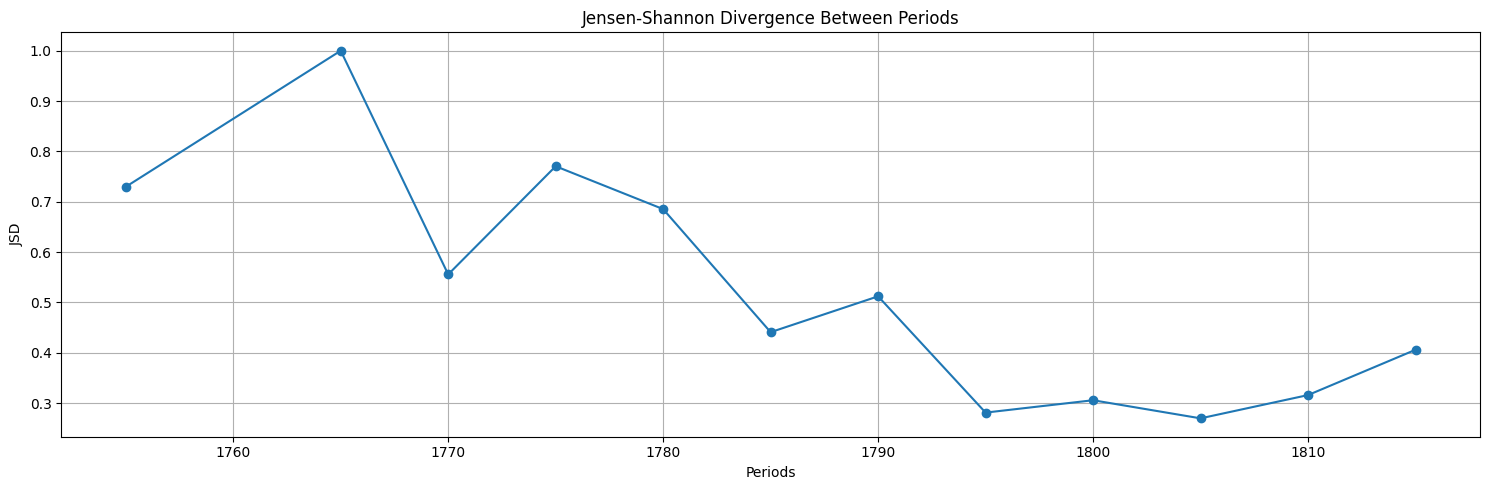

In [23]:
plot_jsd_by_period(sfillers_js_results)

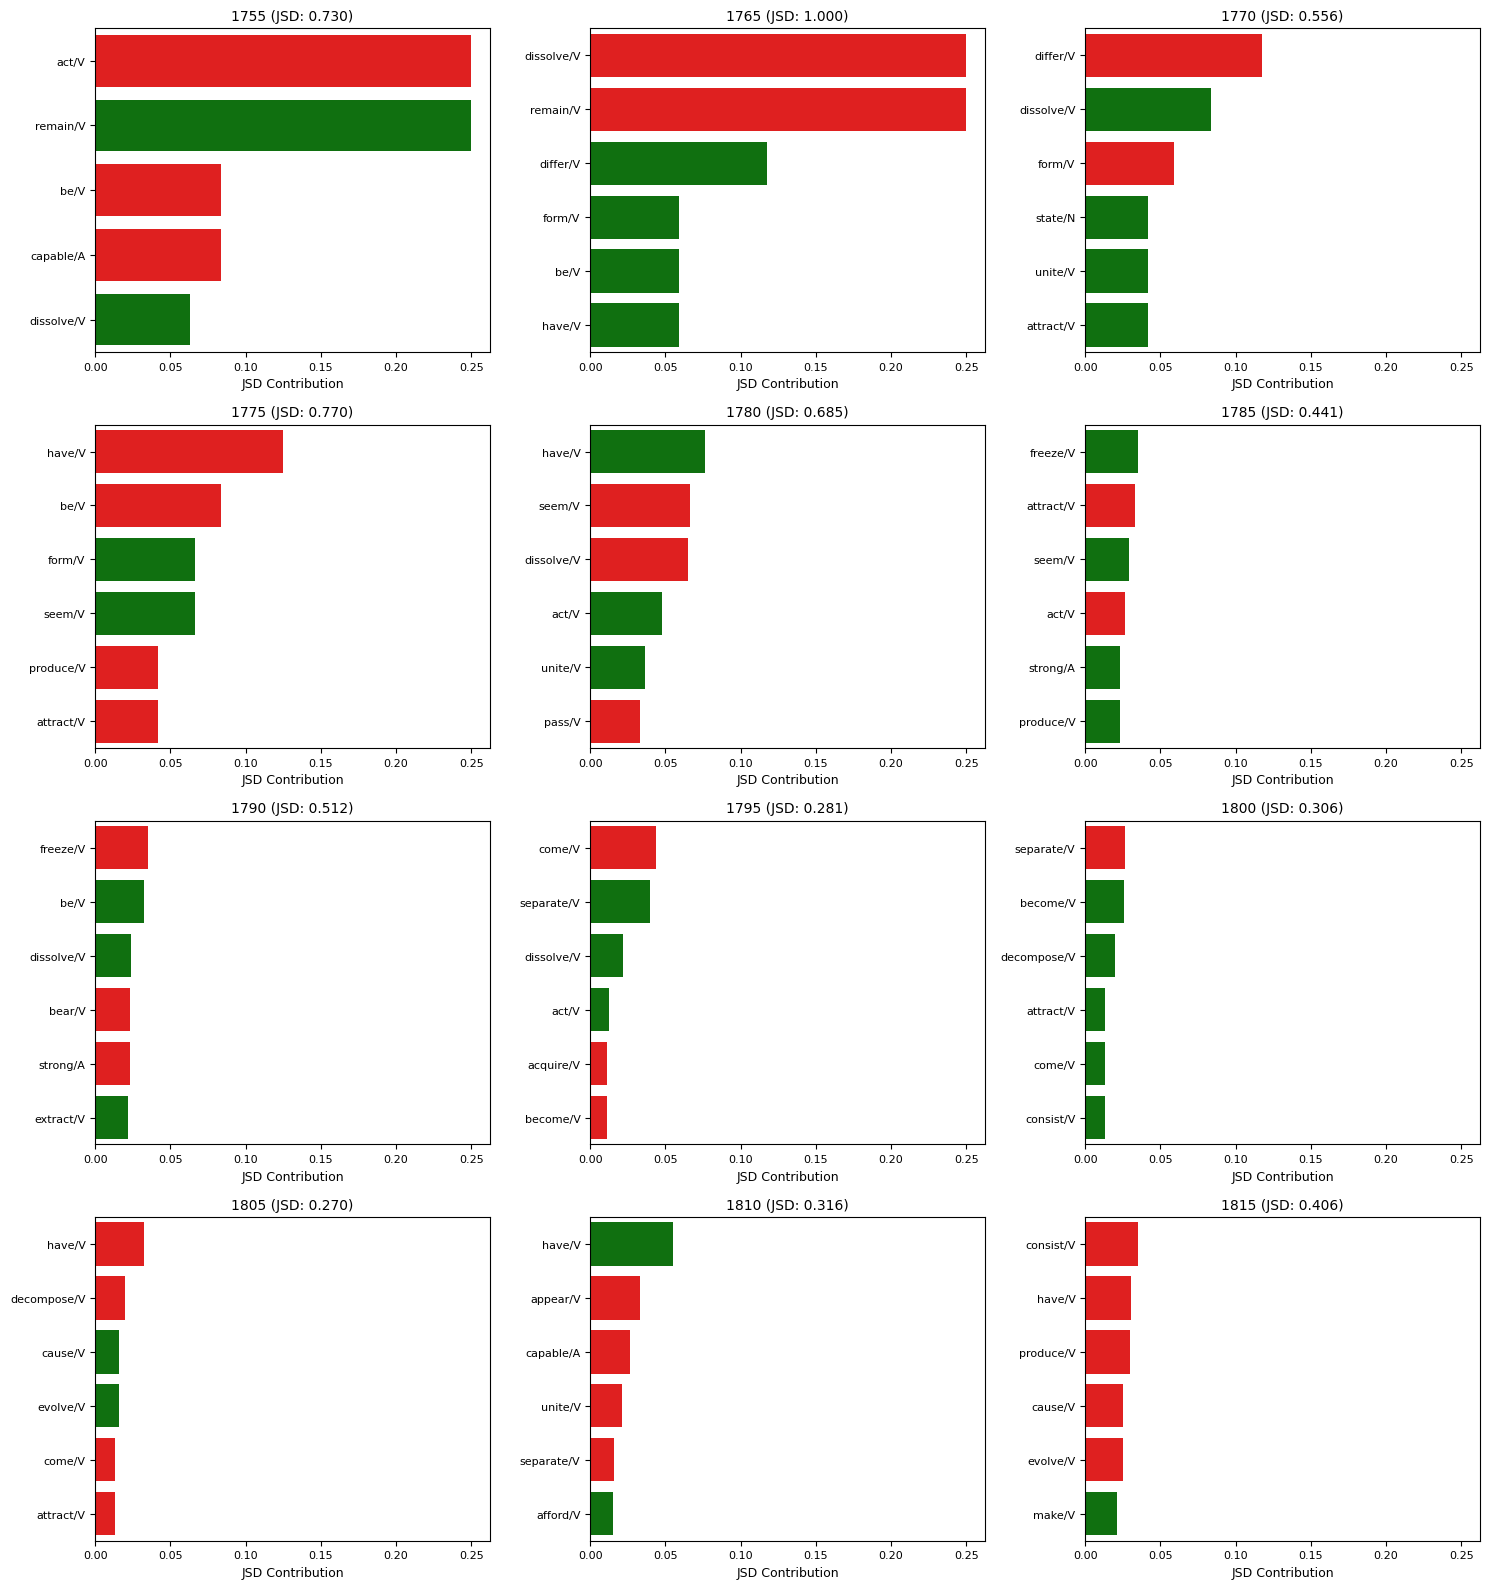

In [24]:
plot_items_jsd_by_period(sfillers_js_results, top_n=6, cols=3)